In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import csv

In [3]:
bias_ratings ='/content/drive/MyDrive/allsides-media-bias-ratings.csv'

bias_dict = {}
with open(bias_ratings, mode='r') as infile:
    reader = csv.reader(infile)
    bias_dict = {rows[0]:rows[1] for rows in reader}

In [4]:
bias_dict

{'AARP': 'Center',
 'ABC News': 'Lean Left',
 'ACLU': 'Lean Left',
 'AP': 'Center',
 'Accuracy in Media': 'Right',
 'Al Cardenas': 'Right',
 'Al Jazeera': 'Center',
 'Alison Lundergan Grimes': 'Left',
 'AllSides': 'Mixed',
 'AllSides Community': 'Mixed',
 'Allysia Finley (Wall Street Journal)': 'Right',
 'AlterNet': 'Left',
 'American Association of Retired Persons': 'Lean Left',
 'American Conservative Union': 'Right',
 'American Enterprise Institute': 'Lean Right',
 'American Spectator': 'Right',
 'American Thinker': 'Right',
 'Americans for Democratic Action': 'Left',
 'Americans for Tax Reform': 'Right',
 'Amnesty International': 'Center',
 'Andrew Napolitano': 'Right',
 'Ann Coulter': 'Right',
 'Annafi Wahed': 'Lean Left',
 'Aquinas College Saint': 'Left',
 'Arkadi Gerney': 'Lean Left',
 'Arkansas Democrat-Gazette': 'Left',
 'Associated Press': 'Center',
 'Association for Psychological Science': 'Center',
 'Atlanta Journal-Constitution': 'Lean Left',
 'Atlas Network': 'Right',
 'A

In [5]:
import difflib
def string_sim(a,b):
    seq = difflib.SequenceMatcher(None, a,b)
    sim = seq.ratio()*100
    return sim

In [8]:
import pandas as pd


In [9]:
df=pd.read_csv('/content/drive/MyDrive/articles_data.csv')
df.shape
df.head(3)

,Unnamed: 0,Title,Text,Source
0,0,Michigan wants to lead U.S. in electric vehicl...,The Dearborn-based automaker chose Tennessee f...,https://www.bridgemi.com/topics
1,1,Republicans’ hold on Lansing power could grow ...,"From a purely geographic perspective, most of ...",https://www.bridgemi.com/topics
2,2,Dueling gatherings highlight split as Michigan...,“The focus of the last election is always goin...,https://www.bridgemi.com/topics


In [10]:
df = df.drop('Unnamed: 0', axis = 1)
df.head(3)

,Title,Text,Source
0,Michigan wants to lead U.S. in electric vehicl...,The Dearborn-based automaker chose Tennessee f...,https://www.bridgemi.com/topics
1,Republicans’ hold on Lansing power could grow ...,"From a purely geographic perspective, most of ...",https://www.bridgemi.com/topics
2,Dueling gatherings highlight split as Michigan...,“The focus of the last election is always goin...,https://www.bridgemi.com/topics


In [11]:
df = df.drop_duplicates(subset = 'Title', keep = 'first')
df = df.drop_duplicates(subset = 'Text', keep = 'first')

In [12]:
df.shape

(1733, 3)

In [13]:
df.isnull().values.any()

True

In [14]:
df.isnull().sum()


Title     0
Text      1
Source    0
dtype: int64

In [15]:
df.dropna()


,Title,Text,Source
0,Michigan wants to lead U.S. in electric vehicl...,The Dearborn-based automaker chose Tennessee f...,https://www.bridgemi.com/topics
1,Republicans’ hold on Lansing power could grow ...,"From a purely geographic perspective, most of ...",https://www.bridgemi.com/topics
2,Dueling gatherings highlight split as Michigan...,“The focus of the last election is always goin...,https://www.bridgemi.com/topics
3,Michigan counties dump mask rules for thousand...,"Marquette, Ottawa, Washtenaw and Kent county h...",https://www.bridgemi.com/topics
4,Gov. Gretchen Whitmer signs $70B Michigan budg...,"The finalized legislation, brokered by Whitmer...",https://www.bridgemi.com/topics
...,...,...,...
2040,The Climate Conversations - S2: The green cons...,10 Sep 2021 12:04PM\n\n24 mins\n\nWe live in a...,https://www.channelnewsasia.com/listen
2041,Heart of the Matter - S2: What are the challen...,09 Sep 2021 03:52PM\n\n50 mins\n\nWith one of ...,https://www.channelnewsasia.com/singapore
2043,The Climate Conversations - S2: Can our homes ...,03 Sep 2021 07:05AM\n\n23 mins\n\nThe home of ...,https://www.channelnewsasia.com/listen
2044,Heart of the Matter - S2: Inside the alternate...,With one of the world’s highest vaccination ra...,https://www.channelnewsasia.com/listen


In [17]:
df1=df.copy()
df1.dropna(subset=['Text'],inplace=True)

In [18]:
df1.pivot_table(index=['Source'], aggfunc='size')

Source
http://nation.foxnews.com                  2
http://www.bbc.com                        23
http://www.cbc.ca                          8
http://www.foxnews.com                    50
http://www.washingtonpost.com            119
                                        ... 
https://www.thestar.com/life              43
https://www.thestar.com/podcasts.html      2
https://www.thestar.com/politics           9
https://www.thestar.com/sports.html        9
https://www.thestar.com/trust.html         1
Length: 75, dtype: int64

In [35]:
df1.loc[df1['Source'].str.contains('cnn'), 'Source'] = 'CNN'
df1.loc[df1['Source'].str.contains('bbc'), 'Source'] = 'BBC'
df1.loc[df1['Source'].str.contains('fox'), 'Source'] = 'FOX'
df1.loc[df1['Source'].str.contains('nbc'), 'Source'] = 'NBC'
df1.loc[df1['Source'].str.contains('bridgemi'), 'Source'] = 'Bridgemi'
df1.loc[df1['Source'].str.contains('washingtonpost'), 'Source'] = 'Washington Post'
df1.loc[df1['Source'].str.contains('theglobeandmail'), 'Source'] = 'Globe and mail'
df1.loc[df1['Source'].str.contains('techcrunch'), 'Source'] = 'Tech Crunch'
df1.loc[df1['Source'].str.contains('globalnews'), 'Source'] = 'Global News'
df1.loc[df1['Source'].str.contains('thestar'), 'Source'] = 'The Star'
df1.loc[df1['Source'].str.contains('channelnews'), 'Source'] = 'Channel News'
df1.loc[df1['Source'].str.contains('cbc'), 'Source'] = 'CBC'

In [37]:

check_sources=df1.pivot_table(index=['Source'], aggfunc='size').to_dict()
print(check_sources)

{'BBC': 132, 'Bridgemi': 28, 'CBC': 126, 'CNN': 291, 'Channel News': 262, 'FOX': 156, 'Global News': 99, 'Globe and mail': 19, 'NBC': 185, 'Tech Crunch': 20, 'The Star': 295, 'Washington Post': 119}


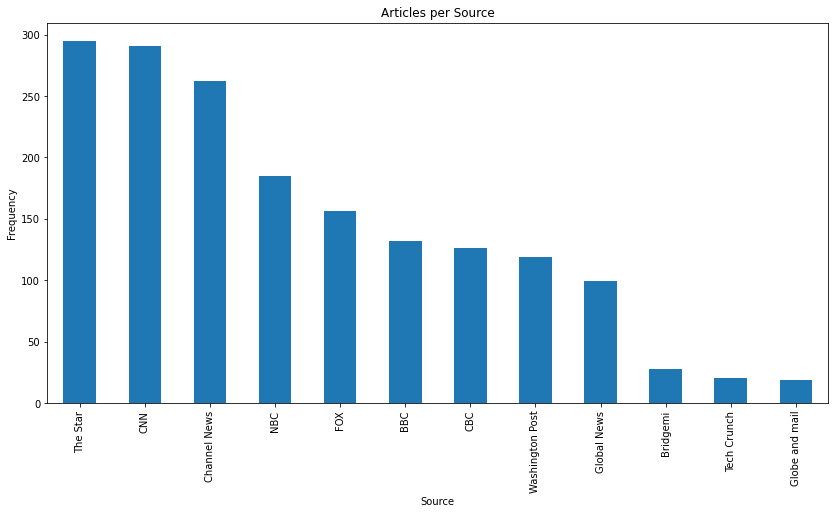

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
ax = df1['Source'].value_counts().plot(kind='bar',
                                    title="Articles per Source")
ax.set_xlabel("Source")
ax.set_ylabel("Frequency")
plt.show()

In [40]:
df_final=df1.copy()
df_final.to_csv('/content/drive/MyDrive/cleaned_data.csv')

In [41]:
def replace_names(check_sources, bias_dict):
    real_source = {}
    for entry in check_sources:
        for source in bias_dict:
            
            sim = string_sim(entry, source)
            count = check_sources[entry]
            
            if entry not in real_source:
                real_source[entry] = [source, sim, count]
            else:
                if sim > real_source[entry][1]:
                    real_source[entry] = [source, sim, count]
                    
    raw_data = {'News_Source':[],'Bias':[], 'Article_Count':[]}
    
    for key in real_source:
        new_key = real_source[key][0]
        new_count = real_source[key][2]
        
        bias = bias_dict[new_key]
        
        raw_data['News_Source'].append(new_key)
        raw_data['Article_Count'].append(new_count)
        raw_data['Bias'].append(bias)
        
    for bias_rating in raw_data['Bias']:
        if bias_rating == 'Mixed':
            bias_rating = bias_rating.replace('Mixed','Center')
    
    source_bias = pd.DataFrame(raw_data, columns = ['News_Source', 'Bias', 'Article_Count']) 

    return source_bias
          
updated_info = replace_names(check_sources, bias_dict)

In [42]:
updated_info

,News_Source,Bias,Article_Count
0,CNBC,Center,132
1,Bearing Drift,Right,28
2,CNBC,Center,126
3,CBN,Right,291
4,Funny News,Right,262
5,FAIR,Lean Left,156
6,Fox News,Lean Right,99
7,Rand Paul,Lean Right,19
8,CNBC,Center,185
9,TechCrunch,Center,20


In [44]:
updated_info.replace(['CNBC','Bearing Drift','CNBC','CBN','Funny News','FAIR','Fox News','Rand Paul','CNBC','TechCrunch','The Root','Washington Post'],['BBC','Bridgemi','CBC','CNN','Channel News','FOX','Global News','Globe and mail','NBC','Tech Crunch','The Star','Washington Post'],inplace=True)
updated_info["News_Source"]=['BBC','Bridgemi','CBC','CNN','Channel News','FOX','Global News','Globe and mail','NBC','Tech Crunch','The Star','Washington Post']
updated_info.to_csv('/content/drive/MyDrive/news-corpus-info.csv')
updated_info

,News_Source,Bias,Article_Count
0,BBC,Center,132
1,Bridgemi,Right,28
2,CBC,Center,126
3,CNN,Right,291
4,Channel News,Right,262
5,FOX,Lean Left,156
6,Global News,Lean Right,99
7,Globe and mail,Lean Right,19
8,NBC,Center,185
9,Tech Crunch,Center,20


In [50]:
import numpy as np

df_new=df_final.copy()
conditions= [
        (df_new['Source']=="BBC"),
        (df_new['Source']=="Bridgemi"),
        (df_new['Source']=="CBC"),
        (df_new['Source']=="CNN"),
        (df_new['Source']=="Channel News"),
        (df_new['Source']=="FOX"),
        (df_new['Source']=="Global News"),
        (df_new['Source']=="Globe and mail"),
        (df_new['Source']=="NBC"),
        (df_new['Source']=="Tech Crunch"),
        (df_new['Source']=="The Star"),
        (df_new['Source']=="Washington Post")    

]
values=["Center","Right","Center","Right","Right","Lean Left","Lean Right","Lean Right","Center","Center","Lean Left","Lean Left"]
df_new["Bias"]=np.select(conditions,values)
df_new


,Title,Text,Source,Bias
0,Michigan wants to lead U.S. in electric vehicl...,The Dearborn-based automaker chose Tennessee f...,Bridgemi,Right
1,Republicans’ hold on Lansing power could grow ...,"From a purely geographic perspective, most of ...",Bridgemi,Right
2,Dueling gatherings highlight split as Michigan...,“The focus of the last election is always goin...,Bridgemi,Right
3,Michigan counties dump mask rules for thousand...,"Marquette, Ottawa, Washtenaw and Kent county h...",Bridgemi,Right
4,Gov. Gretchen Whitmer signs $70B Michigan budg...,"The finalized legislation, brokered by Whitmer...",Bridgemi,Right
...,...,...,...,...
2040,The Climate Conversations - S2: The green cons...,10 Sep 2021 12:04PM\n\n24 mins\n\nWe live in a...,Channel News,Right
2041,Heart of the Matter - S2: What are the challen...,09 Sep 2021 03:52PM\n\n50 mins\n\nWith one of ...,Channel News,Right
2043,The Climate Conversations - S2: Can our homes ...,03 Sep 2021 07:05AM\n\n23 mins\n\nThe home of ...,Channel News,Right
2044,Heart of the Matter - S2: Inside the alternate...,With one of the world’s highest vaccination ra...,Channel News,Right


In [51]:
df_new['Text_length'] = df.Text.str.split().str.len()
df_new

,Title,Text,Source,Bias,Text_length
0,Michigan wants to lead U.S. in electric vehicl...,The Dearborn-based automaker chose Tennessee f...,Bridgemi,Right,1248.0
1,Republicans’ hold on Lansing power could grow ...,"From a purely geographic perspective, most of ...",Bridgemi,Right,331.0
2,Dueling gatherings highlight split as Michigan...,“The focus of the last election is always goin...,Bridgemi,Right,371.0
3,Michigan counties dump mask rules for thousand...,"Marquette, Ottawa, Washtenaw and Kent county h...",Bridgemi,Right,1500.0
4,Gov. Gretchen Whitmer signs $70B Michigan budg...,"The finalized legislation, brokered by Whitmer...",Bridgemi,Right,1363.0
...,...,...,...,...,...
2040,The Climate Conversations - S2: The green cons...,10 Sep 2021 12:04PM\n\n24 mins\n\nWe live in a...,Channel News,Right,91.0
2041,Heart of the Matter - S2: What are the challen...,09 Sep 2021 03:52PM\n\n50 mins\n\nWith one of ...,Channel News,Right,113.0
2043,The Climate Conversations - S2: Can our homes ...,03 Sep 2021 07:05AM\n\n23 mins\n\nThe home of ...,Channel News,Right,89.0
2044,Heart of the Matter - S2: Inside the alternate...,With one of the world’s highest vaccination ra...,Channel News,Right,68.0


In [52]:
bybias = df_new.groupby('Bias')
bybias['Text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
Bias,,,,,,,,
Center,463.0,610.516199,701.684620,7.0,54.5,472.0,948.00,6659.0
Lean Left,570.0,673.582456,914.346499,18.0,131.5,491.5,816.00,7016.0
Lean Right,118.0,540.127119,659.522523,13.0,51.0,316.5,907.25,3677.0
Right,581.0,609.457831,956.243974,9.0,158.0,297.0,880.00,16618.0


Bias
Center        AxesSubplot(0.125,0.125;0.775x0.755)
Lean Left     AxesSubplot(0.125,0.125;0.775x0.755)
Lean Right    AxesSubplot(0.125,0.125;0.775x0.755)
Right         AxesSubplot(0.125,0.125;0.775x0.755)
Name: Text_length, dtype: object

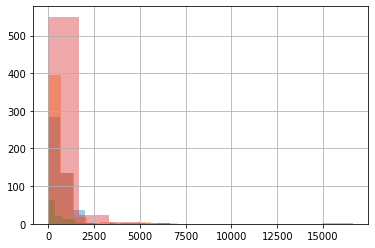

In [53]:
df_new.groupby('Bias').Text_length.hist(alpha=0.4)

In [54]:
df_new.to_csv('/content/drive/MyDrive/articles_with_bias.csv')